In [11]:
from keras import models
from keras import layers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras import optimizers
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import sys

In [4]:
# Augment data
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow from directory
train_generator = train_datagen.flow_from_directory("./train/", target_size=(150,150), batch_size=32, class_mode="categorical")
val_generator = val_datagen.flow_from_directory("./val/", target_size=(150,150), batch_size=32, class_mode="categorical")

Found 1500 images belonging to 3 classes.
Found 1500 images belonging to 3 classes.


In [17]:

# Model architecture
model = models.Sequential()
model.add(layers.Conv2D(64, (3,3), activation="relu", input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Dropout(0.50))

model.add(layers.Conv2D(32, (3,3), activation="relu"))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Dropout(0.50))

model.add(layers.Conv2D(32, (3,3), activation="relu"))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Dropout(0.50))

model.add(layers.Flatten())
model.add(layers.Dense(500, activation="relu"))
model.add(layers.Dropout(0.50))

model.add(layers.Dense(3, activation="softmax"))
model.summary()

model.compile(loss="categorical_crossentropy", optimizer=optimizers.RMSprop(lr=1e-4), metrics=["acc"])

history = model.fit_generator(train_generator, steps_per_epoch=48, epochs=100, validation_data=val_generator, validation_steps=24)

#save model
model.save("./trained_models/1st_model.h5")

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 32)        18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)  

48/48 [==============================] - 2s 43ms/step - loss: 0.3649 - acc: 0.8584 - val_loss: 0.7623 - val_acc: 0.6667: 0s - loss: 0.3591 - acc: 0.
Epoch 40/100
48/48 [==============================] - 2s 44ms/step - loss: 0.3945 - acc: 0.8467 - val_loss: 0.7992 - val_acc: 0.6675
Epoch 41/100
48/48 [==============================] - 2s 46ms/step - loss: 0.3553 - acc: 0.8581 - val_loss: 0.6678 - val_acc: 0.7409
Epoch 42/100
48/48 [==============================] - 2s 48ms/step - loss: 0.3522 - acc: 0.8603 - val_loss: 0.6798 - val_acc: 0.7330
Epoch 43/100
48/48 [==============================] - 2s 47ms/step - loss: 0.3459 - acc: 0.8669 - val_loss: 0.7100 - val_acc: 0.6979
Epoch 44/100
48/48 [==============================] - 2s 47ms/step - loss: 0.3395 - acc: 0.8743 - val_loss: 0.6924 - val_acc: 0.7134
Epoch 45/100
48/48 [==============================] - 2s 46ms/step - loss: 0.3414 - acc: 0.8675 - val_loss: 0.6819 - val_acc: 0.7096
Epoch 46/100
48/48 [==============================] -

48/48 [==============================] - 2s 46ms/step - loss: 0.0743 - acc: 0.9740 - val_loss: 0.6635 - val_acc: 0.7605
homer_simpson


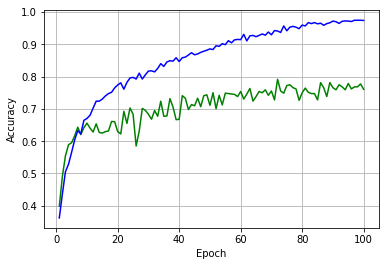

In [45]:
# Graph efficiency
val_acc = history.history["val_acc"]
acc = history.history["acc"]
epochs = range(1, len(acc)+1)

plt.plot(epochs, val_acc, "green", label="Validation")
plt.plot(epochs, acc, "blue", label="Train")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

[[0.17303461 0.7940749  0.03289044]]
homer_simpson


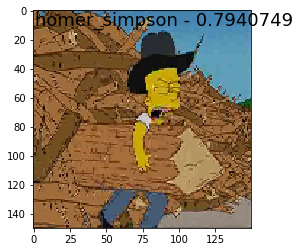

In [46]:
# Predict image
img = image.load_img("./val/bart_simpson/pic_0038.jpg", target_size=(150,150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

pred = model.predict_classes(img_tensor)
for key, value in val_generator.class_indices.items():
    if pred[0] == value:
        prediction = key

confidence = 0
for rate in model.predict(img_tensor)[0]:
    if rate >= confidence:
        confidence = rate

print(pred_conf)
print(prediction)

plt.text(1, 10, "%s - %s"%(prediction, confidence), fontsize=18)
plt.imshow(img_tensor[0])

In [44]:
%matplotlib inline